<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/3_7_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.7 - Neural Networks**

Artificial neural networks is a collection of connected layers of units or nodes
to loosely model the neurons in a biological brain. In this section, we illustrate the use of differentiation for training artificial neural networks to minimize cost functions.

### **3.7.0 - Python Libraries for Neural Networks**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn

### **3.7.1 - Mathematical Formulation**

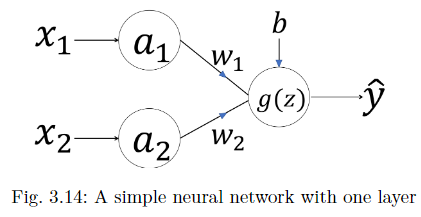

Figure $3.14$ shows the simplest network. $x_1$ and $x_2$ are inputs from the left and a forecast output on the right, $\hat{y}$, modified by the activation function $\sigma(z)$, is chosen in advance.
\begin{equation*}
  \hat{y} = \sigma(z) = \sigma\left(w_1a_1 + w_2a_2 + b\right)
\end{equation*}
In neural networks, the weights $w_i$ and the bias $b$ will be found numerically in order to best fit our forecast output with our given data.

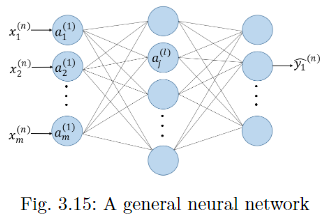

For a general neural network as in Figure 3.15 is a neural network. A
general network may has hundreds or thousands of nodes. It demonstrates the
inputs and outputs of neural networks. The input units receive various forms
and structures of information based on an internal weighting system, and the
neural network attempts to learn about the information presented to produce
one output report. Specifically, it adjust its weighted associations according
to a learning rule and using this error value. Successive adjustments will
cause the neural network to produce output which is increasingly similar to
the target output. After a sufficient number of these adjustments the training can be terminated based upon certain criteria. This is known as supervised
learning.

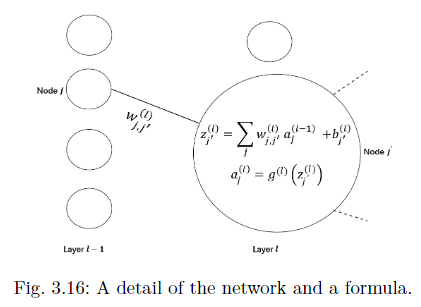

Now we formulate mathematical notation for a neural network. In Figure 3.16, we look at how values of layer $l$ are determined from layer $l - 1, w^l$ and $b^l$. We label the two layers as $l - 1$ and $l$. Notice that the general node in the left-hand layer is labelled $j$ and one node in the right-hand layer, layer $l$, is labelled $j'$. We want to calculate what value goes into the $(j')^{\text{th}}$ node of the $l^{\text{th}}$ layer. First, multiply the value $a_j^{(l - 1)}$ in the $j^{\text{th}}$ node of the previous $(l - 1)^{\text{th}}$ layer by the parameter $w_{j, j'}^{(l)}$. Then, add another parameter $b_{j'}^{(l)}$. Then, we add up all of these values for every node in layer $l - 1$. Let
\begin{equation*}
  z_{j'}^{(l)} = \sum_{j = 1}^{J_{l - 1}} w_{j, j'}^{(l)} a_j^{(l - 1)} + b_{j'}^{(l)}
\end{equation*}
where $J_{I}$ is the number of nodes in layer $l$. For a given activation function $\sigma$, the following expression for the values in the next layer is 
\begin{equation*}
  a_{j'}^{(l)} = \sigma\left(z_{j'}^{(l)}\right)
\end{equation*}
In matrix form,
\begin{equation*}
  z^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l - 1)} + \mathbf{b}^{(l)}
\end{equation*}
with the matrix $\mathbf{W}^{(l)}$ containing all the multiplicative parameters, i.e. the weights $w_{j, j'}^{(l)}$, and $\mathbf{b}^{(l)}$ is the bias. The bias is just the constant in the linear transformation.
\begin{equation*}
  a^{(l)} = \sigma\left(\mathbf{z}^{(l)}\right) = \sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l - 1)} + \mathbf{b}^{(l)}\right)
\end{equation*}

### **3.7.2 - Activation Functions**

In neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes (e.g., classification). In biological neural networks, the activation function may represent an electrical signal whether if the neuron fires. We use $\sigma$ to represent the activation functions. It will be the same for all nodes in a layer.
\begin{equation*}
  a^{(l)} = \sigma\left(\mathbf{z}^{(l)}\right) = \sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l - 1)} + \mathbf{b}^{(l)}\right)
\end{equation*}
Here, we discuss a number of acitivation functions.

##### Definition 3.7.2.1 - Step Functions

The step function is defined as
\begin{equation*}
  \sigma(x)= \begin{cases} 
    0 & x < 0 \\ 
    1 & x \geq 0
  \end{cases}
\end{equation*}
This is also called the Heaviside step function, or the unit step function, often represents a signal that switches on at a specified time and stays switched on indefinite. The step function can be use for classification problems.

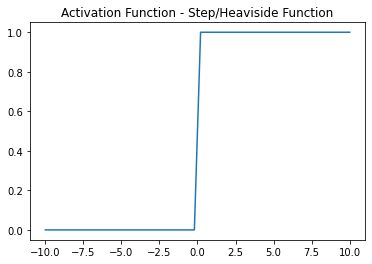

In [4]:
def StepFunction(x):
    return np.heaviside(x,1)

x = np.linspace(-10, 10)
plt.plot(x, StepFunction(x))
plt.title('Activation Function - Step/Heaviside Function')
plt.show()

##### Definition 3.7.2.2 - ReLU Functions

Positive linear/ReLU function is defined as
\begin{equation*}
  \sigma(x) = \max\{0, x\}
\end{equation*}
ReLU stands for Rectified Linear Units. It's one of the most commonly used activation functions. The signal either passes through untouched or dies completely. It was found to enable better training of deeper networks compared to the widely used activation functions. Rectified linear units, compared to the sigmoid function or similar activation functions, allow faster and effective training of deep neural architectures on large and complex datasets.

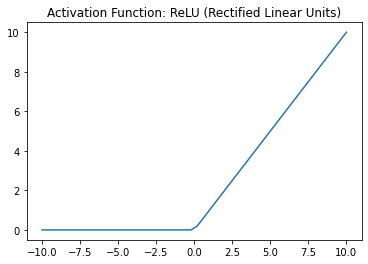

In [8]:
def ReLUFunction(x):
    input = []
    for i in x:
        if i < 0:
            input.append(0)
        else:
            input.append(i)
    return input

x = np.linspace(-10, 10)
plt.plot(x, ReLUFunction(x))
plt.title('Activation Function: ReLU (Rectified Linear Units)')
plt.show()

##### Definition 3.7.2.3 - Sigmoid Functions

The Sigmoid or logistic function is
\begin{equation*}
  \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation*}
The logistic function finds applications in a range of fields, including biomathematics. The logistic sigmoid can be used in the output layer for predicting probability.

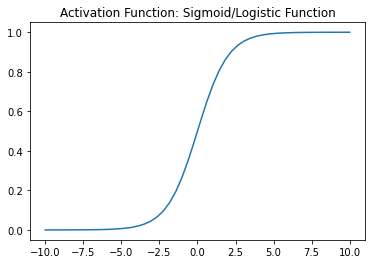

In [9]:
def SigmoidFunction(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, SigmoidFunction(x))
plt.title('Activation Function: Sigmoid/Logistic Function')
plt.show()

##### Definition 3.7.2.4 - Softmax Functions

The softmax function converts a vector of numbers (an array of $K$ values $(z)$ ) into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. It is thus a function that turns several numbers into quantities that can be perhaps interpreted as probabilities.
\begin{equation*}
  \frac{e^{z_k}}{\left(\displaystyle\sum_{k = 1}^K e^{z_k}\right)}
\end{equation*}
It is often used in the final output layer of a neural network, especially with classification problems.

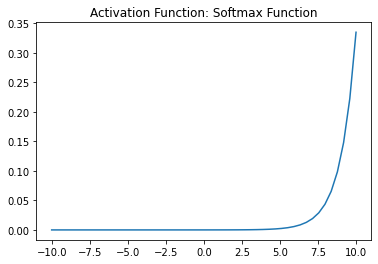

In [10]:
def SoftmaxFunction(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.linspace(-10, 10)
plt.plot(x, SoftmaxFunction(x))
plt.title('Activation Function: Softmax Function')
plt.show()

### **3.7.3 - Cost Function**

In practice, we can use the least squares for a cost function. Since we will have a set of independent input data $y^n$ (from the training dataset) and corresponding output data $\hat{y}^n$ or the forecast output. $k$ is the $k$-th node of the output. We define the cost function as
\begin{equation*}
  J = \frac{1}{2} \sum_{n = 1}^N \sum_{K = 1}^K \left(\hat{y}_k^{(n)} - y_k^{(n)}\right)^2
\end{equation*}
For classification problems where there is only one output, the cost function commonly used for such an output is similar to a logistic regression. For a binary classification $y^{(n)} = 0, 1$, the cost function is
\begin{equation*}
  J = -\sum_{n = 1}^N \left(y^{(n)} \ln \left(\hat{y}^{(n)}\right) + \left(1 - y^{(n)}\right) \ln \left(1 - \hat{y}^{(n)}\right)\right)
\end{equation*}
This is related to the cross entropy function.

### **3.7.4 - Backpropagation**

Backpropagation is the essence of neural network training. It is the practice of fine-tuning the weights of a neural network based on the error rate (i.e. loss) obtained in the previous iteration. Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. We want to minimize the cost function, $J$, with respect to the parameters, the components of $\mathbf{W}$ and $b$. To do that using gradient descent we are going to need the derivatives of $J$ with respect to each of those parameters. Here we focus the layer $l$ and node $j'$ and node $j$ from layer $l - 1$.
\begin{equation*}
  \frac{\partial J}{\partial w_{j, j'}^{(l)}} \operatorname{ and } \frac{\partial J}{\partial b_{j'}^{(l)}}
\end{equation*}
We introduce the quantity
\begin{equation*}
  \delta_{j'}^{(l)} = \frac{\partial J}{\partial z_{j'}^{(l)}}
\end{equation*}
From the Chain Rule, we have
\begin{equation*}
  \delta_j^{(l - 1)} = \frac{\partial J}{\partial z_j^{(l - 1)}} = \sum_{j'} \frac{\partial J}{\partial z_{j'}^{(l)}} \frac{\partial z_{j'}^{(l)}}{\partial z_j^{(l - 1)}}
\end{equation*}
It follows that
\begin{equation*}
  z_{j'}^{(l)} = \sum_{j_k} w_{j_k, j'}^{(l)} a_{j_k}^{(l - 1)} + b_{j'}^{(l)} = \sum_{j_k} w_{j_k, j'}^{(l)} \sigma\left(z_{j_k}^{(l - 1)}\right) + b_{j'}^{(l)}
\end{equation*}
In addition,
\begin{equation*}
  \delta_j^{(l - 1)} = \left.\frac{dg^{(l - 1)}}{dz}\right|_{z_j^{(l - 1)}} \sum_{j'} \frac{\partial J}{\partial z_{j'}^{(l)}} w_{j, j'}^{(l)} = \left.\frac{dg^{(l - 1)}}{dz}\right|_{z_j^{(l - 1)}} \sum_{j'} \delta_{j'}^{(l)} w_{j, j'}^{(l)}
\end{equation*}
As a result, we can find the $\delta$'s in a layer if we know the $\delta$'s in all layers to the right. In summary, we have
\begin{equation*}
  \frac{\partial J}{\partial w_{j, j'}^{(l)}}=\frac{\partial J}{\partial z_{j'}^{(l)}} \frac{\partial z_{j'}^{(l)}}{\partial w_{j, j'}^{(l)}}=\delta_{j'}^{(l)} a_j^{(l - 1)}
\end{equation*}
Now, the derivatives of the cost function, $J$, to the $w$'s can be written in terms of the $\delta$'s which in turn are backpropagated from the network layers that are just to the right, one nearer the output. Additionally, the derivatives of the cost function to the bias, $b$ is
\begin{equation*}
  \frac{\partial J}{\partial b_{j'}^{(l)}}=\delta_{j'}^{(l)}
\end{equation*}
It is clear that the derivatives of $J$ are depending on which activation function we use. If it is ReLU, then the derivative is either zero or one. Ifwe use the logistic function, then we find that $\sigma'(z) = \sigma(1 - \sigma)$.

### **3.7.5 - Backpropagation Algorithm**

From the analysis above, we can easily derive the backpropagation algorithm as follows. First, we initialize weights and biases, typically at random. Then, pick input data and input the vector $x$ into the left side of the network, and calculate all the $z_s, a_s$, etc. Finally, calculate the output $\hat{y}$. We now can update the parameters by the (stochastic) gradient descent. Repeat the process until the desired accuracy is reached. For example, if we are using the quadratic cost function in one dimension, then
\begin{equation*}
  \delta^{(L)} = \left.\frac{dg^{(L)}}{dz}\right|_{z_j^{(L)}}(\hat{y} - y)
\end{equation*}
Continue to the left, we see that
\begin{equation*}
  \delta_j^{(l - 1)} = \left.\frac{dg^{(l-1)}}{dz}\right|_{z_j^{(l - 1)}} \sum_j \delta_{j'}^{(l)} w_{j, j'}^{(l)}
\end{equation*}
Then, update the weights and biases using the formulas
\begin{equation*}
  \text{New $w_{j, j'}^{(l)}$} = \text{Old $w_{j, j'}^{(l)} - \beta \frac{\partial J}{\partial w_{j, j'}^{(l)}} = \text{Old } w_{j, j'}^{(l)} - \beta \delta_{j'}^{(l)} a_j^{(l - 1)}$}
\end{equation*}
and
\begin{equation*}
  \text{New $b_{j^{\prime}}^{(l)}$} = \operatorname{Old} b_{j'}^{(l)} - \beta \frac{\partial J}{\partial b_{j'}^{(l)}} = \operatorname{Old} b_{j'}^{(l)} - \beta \delta_{j'}^{(l)}
\end{equation*}

### **3.7.6 - References**

1. MAT 494 Chapter 3 Notes